In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/saurav-sabu/datasets/main/train.csv")

In [ ]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [ ]:
data.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
25977,25977,0.70,Premium,E,VS1,58.2,60.0,5.85,5.79,3.38,2901
11049,11049,1.70,Ideal,J,SI1,61.7,59.0,7.61,7.64,4.71,8442
55347,55347,0.30,Very Good,G,VVS2,63.2,57.0,4.28,4.24,2.69,878
169856,169856,0.43,Ideal,G,IF,62.1,56.0,4.83,4.85,3.00,1433
56821,56821,0.37,Premium,F,VS2,59.6,60.0,4.71,4.68,2.79,1016
153552,153552,0.30,Ideal,G,SI1,61.6,57.0,4.28,4.31,2.65,497
58303,58303,0.91,Very Good,G,VS2,63.0,59.0,6.11,6.13,3.86,3890
35290,35290,0.78,Ideal,E,VS2,61.6,56.0,5.92,5.97,3.66,6806
25962,25962,0.79,Ideal,E,VS2,62.1,57.0,5.92,5.96,3.69,3149
64515,64515,0.54,Ideal,F,SI1,61.7,55.0,5.26,5.24,3.24,1363


In [ ]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
data.shape

(193573, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [ ]:
data.drop("id",axis=1,inplace=True)

In [ ]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [ ]:
data.duplicated().sum()

0

In [ ]:
cat_columns = data.select_dtypes(include="object").columns

In [ ]:
num_columns = data.select_dtypes(exclude="object").columns

In [ ]:
data[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
 6   price   193573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 10.3 MB


In [ ]:
data[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cut      193573 non-null  object
 1   color    193573 non-null  object
 2   clarity  193573 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [ ]:
data[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [ ]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
for column in cat_columns:
    print(data[column].value_counts())
    print("----------------------")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
----------------------
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
----------------------
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
----------------------


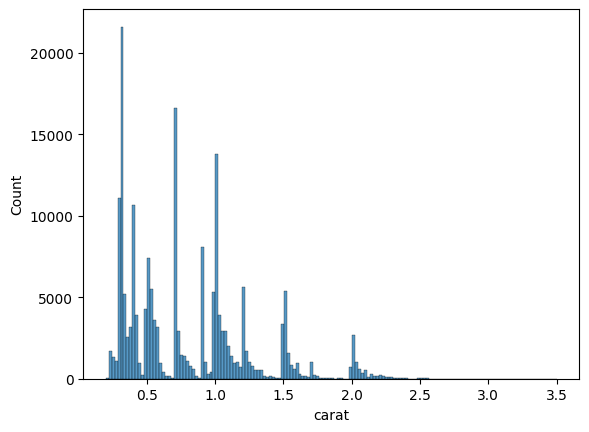

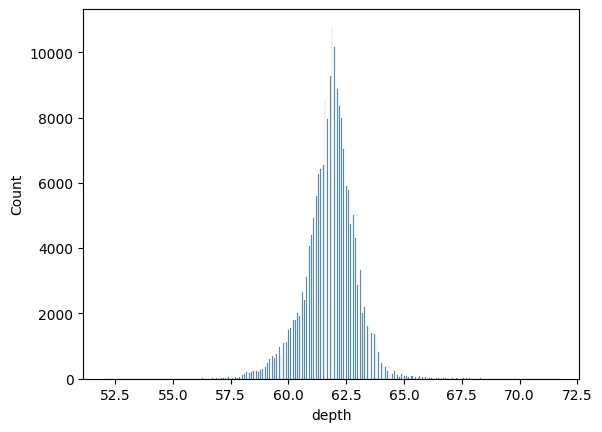

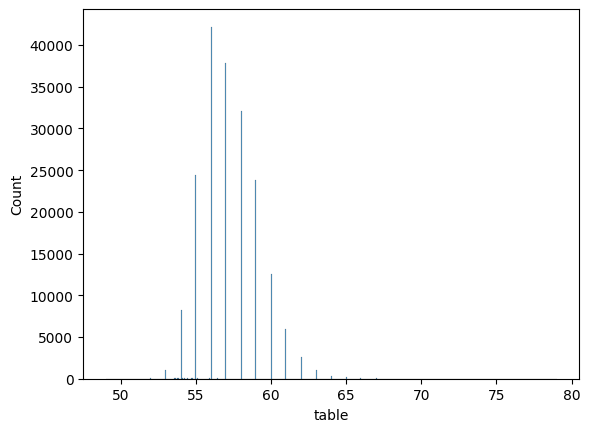

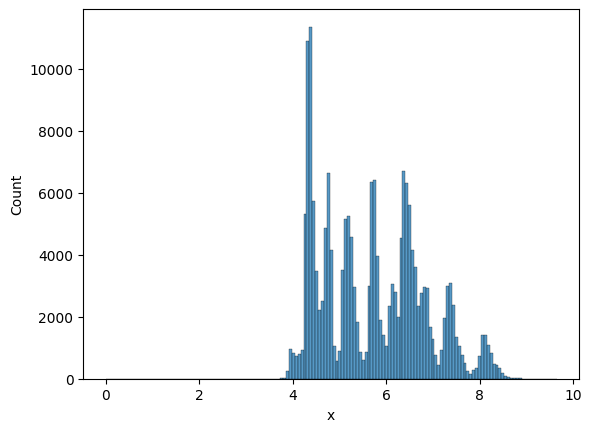

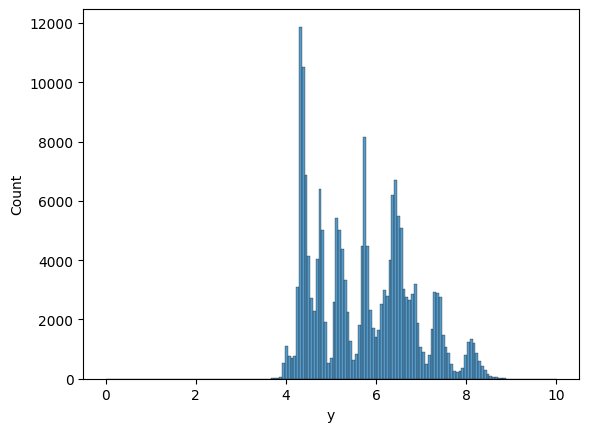

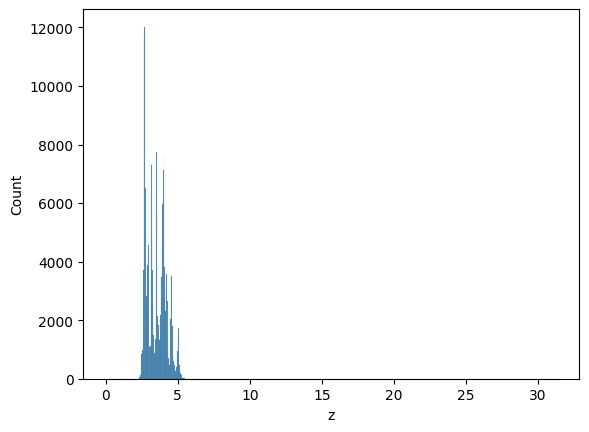

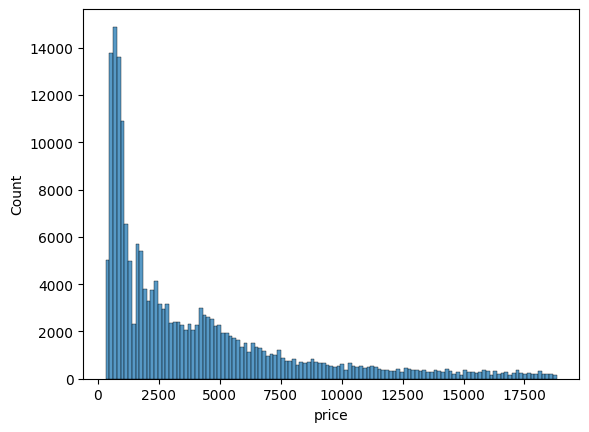

In [19]:
for column in num_columns:
    sns.histplot(data[column])
    plt.show()

<Axes: >

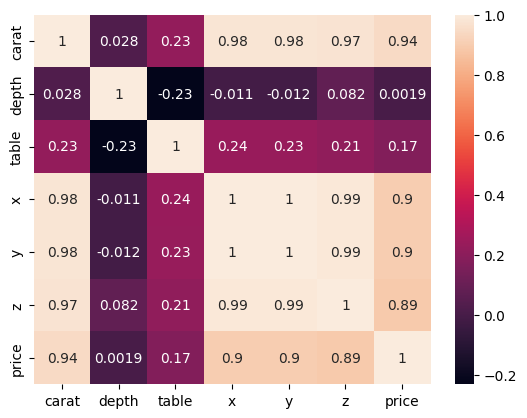

In [20]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [21]:
data[cat_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [22]:
cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
color_map = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [23]:
data["cut"] = data["cut"].map(cut_map)
data["clarity"] = data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

In [24]:
data = pd.read_csv("https://raw.githubusercontent.com/saurav-sabu/datasets/main/train.csv")

In [25]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

In [27]:
X = data.drop(["price","id"],axis=1)
y = data["price"]

In [28]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [29]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [30]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [31]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [32]:
num_pipeline = Pipeline(
    steps = [
        ("imputer",SimpleImputer()),
        ("scaling",StandardScaler()),
    ]
)

In [33]:
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
color_categories = ["D","E","F","G","H","I","J"]
clarity_categories = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [34]:
cat_pipeline = Pipeline(
    steps = [
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("encoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

In [35]:
preprocessor = ColumnTransformer(
    [
        ("num_pipe",num_pipeline,num_cols),
        ("cat_pipe",cat_pipeline,cat_cols)
    ]
)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [39]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         1.        ,  3.        ]])

In [40]:
preprocessor.get_feature_names_out()

array(['num_pipe__carat', 'num_pipe__depth', 'num_pipe__table',
       'num_pipe__x', 'num_pipe__y', 'num_pipe__z', 'cat_pipe__cut',
       'cat_pipe__color', 'cat_pipe__clarity'], dtype=object)

In [41]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [42]:
X_train.head()

,num_pipe__carat,num_pipe__depth,num_pipe__table,num_pipe__x,num_pipe__y,num_pipe__z,cat_pipe__cut,cat_pipe__color,cat_pipe__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0


In [43]:
X_test.head()

,num_pipe__carat,num_pipe__depth,num_pipe__table,num_pipe__x,num_pipe__y,num_pipe__z,cat_pipe__cut,cat_pipe__color,cat_pipe__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,0.0,2.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,3.0,1.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,1.0,6.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,5.0,6.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,4.0,2.0


In [44]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [45]:
models = {
    "LinearRegression":LinearRegression(),
    "RandomForest":RandomForestRegressor(),
    "xgboost":XGBRegressor()
}

In [46]:
trained_model_list = []
model_list = []
r2_list = []

In [47]:
list(models)

['LinearRegression', 'RandomForest', 'xgboost']

In [48]:
for key,value in models.items():
    print(value)


LinearRegression()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [51]:
def evaluate_model(y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    return mae,mse,r2

In [54]:
for key,model in models.items():
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)

    mae,mse,r2 = evaluate_model(y_test,y_pred)
    print(key)
    print(mse)
    print(mae)
    print(r2)

    r2_list.append(r2)
    print("*" * 10)

LinearRegression
1029473.3531156892
675.075827006745
0.9362906819996045
**********
RandomForest
373748.7852407537
309.9511064082799
0.9768704258938805
**********
xgboost
345616.14680618217
297.25052956080435
0.9786114240487077
**********


In [55]:
r2_list

[0.9362906819996045,
 0.9362906819996045,
 0.9362906819996045,
 0.9768704258938805,
 0.9786114240487077]